In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Info_Content.csv
/kaggle/input/Info_UserData.csv
/kaggle/input/Log_Problem.csv


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [26]:
df_problem = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Log_Problem.csv')
df_content = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_Content.csv')
df_user = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_UserData.csv')

**dataset description**
There are three tables provided in the dataset
The Log_Problem.csv recorded 16,217,311 problem attempt logs of 72,758 students for a year from 2018/08/01 to 2019/07/31.
Info_Content.csv describes the metadata of the exercises, each exercise is a basic unit of learning consisted of many problems
Info_UserData.csv describes the metadata of the selected registered students in Junyi Academy.



In [4]:
df_problem.describe()

df_problem.to_csv('df_problem')

,problem_number,exercise_problem_repeat_session,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
count,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07
mean,1.045406e+01,1.261218e+00,4.438166e+01,1.874895e+00,5.333163e-01,4.827990e-01
std,2.015863e+01,1.173484e+00,1.005375e+02,3.547947e+00,1.156917e+00,9.370259e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.200000e+01,1.000000e+00,4.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00
max,1.702000e+03,1.190000e+02,1.800000e+03,1.000000e+03,6.500000e+01,4.000000e+00


In [5]:
df_user.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442
std,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000


In [6]:
df_content.describe()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
count,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
unique,1330,1320,1,4,1,3,1,10,42,171
top,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【一般】函數關係式,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=
freq,1,2,1330,835,1330,784,1330,553,146,18


**Number of students by their gender**

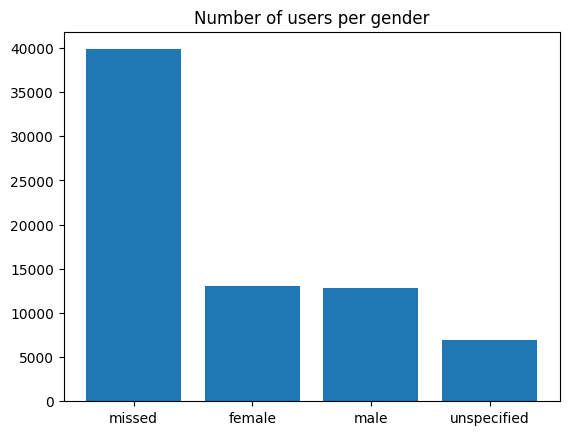

In [7]:
df_user = df_user.fillna('missed')
count_each_gender = df_user['gender'].value_counts()
plt.title('Number of users per gender')
plt.bar(count_each_gender.index, count_each_gender.values)
plt.show()

The Majority of the students do not set their gender on the platform.


**What do "problem number" and "exercise_problem_repeat_session" mean?**


In [9]:
learning_path = df_problem[(df_problem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=") &
                              (df_problem['ucid'] == "FDFKlshYbN4rO93MtgimwfpEoKerSWp1RFhoSKWXHsY=")]
learning_path = learning_path.sort_values(by=['problem_number']).reset_index()
learning_path = learning_path[['timestamp_TW', 'upid', 'problem_number', 'exercise_problem_repeat_session', 'is_correct']]
learning_path

,timestamp_TW,upid,problem_number,exercise_problem_repeat_session,is_correct
0,2019-01-10 15:15:00 UTC,8RgyFGPADCzKer4c+WkbYSfWHbYhUCoHSs3NVlvQ37M=,1,1,False
1,2019-01-10 15:15:00 UTC,gvkit+dkQD81FLPXRBG9USrFx24lQxgr2SfDG212gew=,2,1,True
2,2019-01-10 15:15:00 UTC,4vympbRDgA7iHaVZN28Sdt1Mjc64qVNiheMdzzLw848=,3,1,False
3,2019-01-10 15:15:00 UTC,JFHat1/XV6jI7lnH3Ie05LQq8ddtqGdRtGS+Zv5ktKw=,4,1,False
4,2019-01-10 15:15:00 UTC,ylIYz66eXJ0MoSlTJeqjjUb5UehTUZce2Rm+IP+FfOw=,5,1,False
5,2019-01-10 15:30:00 UTC,B1PrT/py+XEr+K4JlLiq1E+vWNbmqILogf2ZB5MKW6M=,6,1,False
6,2019-01-10 15:30:00 UTC,l5jA3SEThCj9leprxEreYDJ/rqyTS7mOawZTBqOT1Tc=,7,1,False
7,2019-01-10 15:30:00 UTC,9RTF6yX765/oZGCZ67eSYOi3+zUhCViQf++nRfcAHIc=,8,1,False
8,2019-01-10 15:30:00 UTC,IpxNBdxIhTALsJFihJF8EoDxAqIiHXiz6V2DQ1zkTk0=,9,1,False
9,2019-01-10 15:30:00 UTC,6BcqHV4IU/BTV7Sajr2YHTfiRxDit3S8Ty3g31FCvuM=,10,1,False


Observing the table, we can conclude that:

1. "problem number" is the problem order in the exercise for the user
2. "exercise_problem_repeat_session" is how many times the user encounter this problem
3. The timestamp is rounded to the nearest 15 minute interval to preserve privacy in the dataset

**top 5 city all of users**

In [10]:
print(df_user['user_city'].value_counts().head(5))

user_city
tp      12494
ntpc    10808
tc      10710
ty       7615
kh       6888
Name: count, dtype: int64


In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
import folium

# Coordinates for the center of Taiwan
taiwan_center = [23.6978, 120.9605]

# Create the map centered around Taiwan
taiwan_map = folium.Map(location=taiwan_center, zoom_start=7)

# Define the cities and their coordinates
cities = [
    {"name": "Taipei", "coordinates": [25.0330, 121.5654]},
    {"name": "New Taipei", "coordinates": [25.0169, 121.4628]},
    {"name": "Taichung", "coordinates": [24.1477, 120.6736]},
    {"name": "Taoyuan", "coordinates": [24.9936, 121.3010]},
    {"name": "Kaohsiung", "coordinates": [22.6273, 120.3014]}
]

# Add markers for each city
for city in cities:
    folium.Marker(
        location=city["coordinates"],
        popup=city["name"],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(taiwan_map)
    
    
# Display the map
taiwan_map


most of students are from Taipei, New Taipei, Taichung, Taoyuan, Kaohsiung

**The relation between levels, exercise and problem.**

In [13]:
!pip install pillow


Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp5rdy7cu1.PNG'


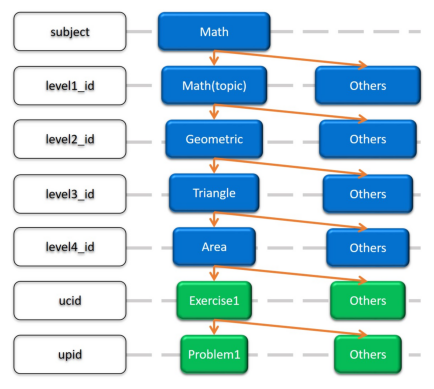

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/relation/fi8rgqK.jpg'
img = Image.open(image_path)

# Display the image using Pillow's show method
img.show()

# Alternatively, display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


**Impact of Academic Calendar and Holidays on User Login Trends in junyi academy**


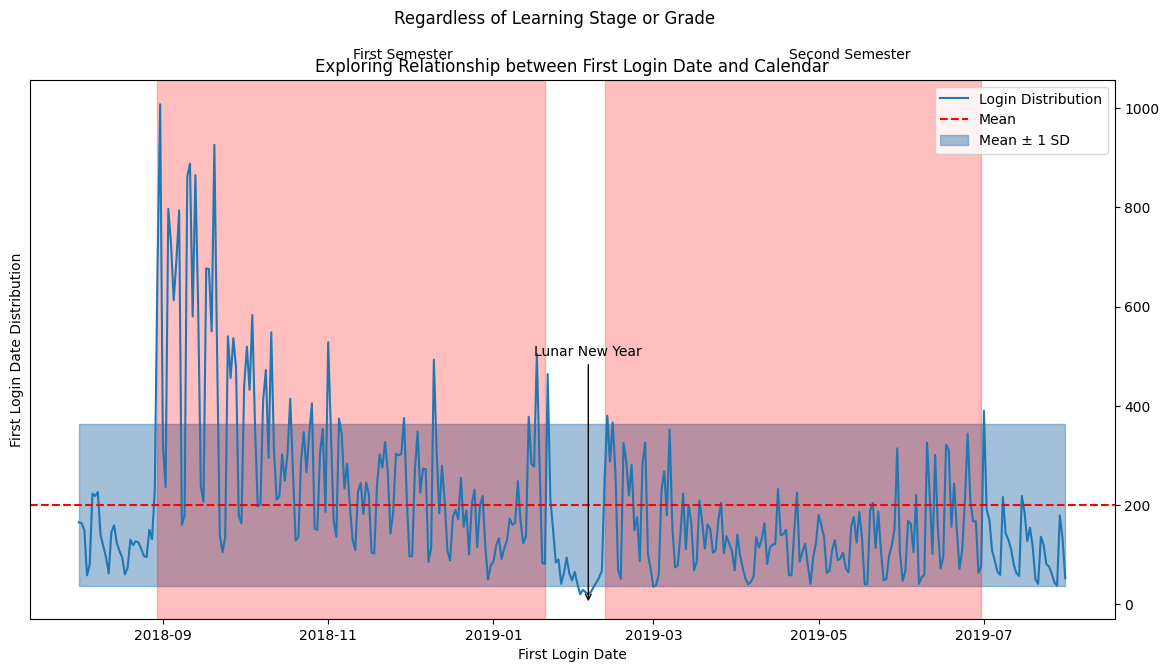

In [12]:
# Convert 'first_login_date_TW' to datetime
df_user['first_login_date_TW'] = pd.to_datetime(df_user['first_login_date_TW'])

# Group by 'first_login_date_TW' and calculate the distribution
login_distribution = df_user.groupby('first_login_date_TW').size().reset_index(name='first_login_date_distribution')

# Calculate mean and standard deviation of the distribution
mean_dist = login_distribution['first_login_date_distribution'].mean()
std_dist = login_distribution['first_login_date_distribution'].std()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(login_distribution['first_login_date_TW'], login_distribution['first_login_date_distribution'], label='Login Distribution')
plt.axhline(y=mean_dist, color='red', linestyle='--', label='Mean')
plt.fill_between(login_distribution['first_login_date_TW'], mean_dist - std_dist, mean_dist + std_dist, color='steelblue', alpha=0.5, label='Mean ± 1 SD')

# Annotations for academic semesters
plt.axvspan(datetime.strptime("2018-08-30", "%Y-%m-%d"), datetime.strptime("2019-01-20", "%Y-%m-%d"), color='red', alpha=0.25)
plt.text(datetime.strptime("2018-11-10", "%Y-%m-%d"), 1100, "First Semester", color='black')

plt.axvspan(datetime.strptime("2019-02-11", "%Y-%m-%d"), datetime.strptime("2019-06-30", "%Y-%m-%d"), color='red', alpha=0.25)
plt.text(datetime.strptime("2019-04-20", "%Y-%m-%d"), 1100, "Second Semester", color='black')

# Annotations with arrows and text
special_dates = {
    "2019-02-05": "Lunar New Year",
}

for date, label in special_dates.items():
    plt.annotate(label, xy=(pd.Timestamp(date), 0), xytext=(pd.Timestamp(date), 500),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, ha='center')

# Customizing the plot
plt.gca().yaxis.set_ticks_position('right')
plt.title("Exploring Relationship between First Login Date and Calendar")
plt.suptitle("Regardless of Learning Stage or Grade")
plt.xlabel("First Login Date")
plt.ylabel("First Login Date Distribution")
plt.legend()

plt.show()


Reference the first login date (first_login_date_TW). We observed a trend showing a surge at the beginning of the semester and the start of holidays. 

The highest activity occurred on August 31, 2018, the second day of the fall semester. The lowest activity was on February 5, 2019, the third day of the Lunar New Year, with the top five lowest values ranging from New Year's Eve to the fourth day of the **Lunar New Year**.

**Impact of Academic Calendar on Student Motivation and Retention in Exercise Programs: A Cohort Analysis**

In [5]:
df3_cr = df_problem.copy()
df3_cr = df3_cr.drop(['is_downgrade', 'is_upgrade', 'problem_number', 'exercise_problem_repeat_session', 'total_attempt_cnt', 'used_hint_cnt','is_hint_used','level','total_sec_taken', 'is_correct'], axis=1)
df3_cr['timestamp_TW']= pd.to_datetime(df3_cr['timestamp_TW']).dt.strftime('%Y-%m-%d')
df3_cr['timestamp_TW']= pd.to_datetime(df3_cr['timestamp_TW'])

In [6]:
df3_cr['order_week'] = df3_cr['timestamp_TW'].dt.to_period('W')
df3_cr['cohort'] = df3_cr.groupby('uuid')['timestamp_TW'] \
                 .transform('min') \
                 .dt.to_period('W')

In [7]:
from operator import attrgetter
df3_cr_cohort = df3_cr.groupby(['cohort', 'order_week']) \
              .agg(n_customers=('uuid', 'nunique')) \
              .reset_index(drop=False)
df3_cr_cohort['timestamp_TW'] = (df3_cr_cohort.order_week - df3_cr_cohort.cohort).apply(attrgetter('n'))

In [9]:
cohort_pivot = df3_cr_cohort.pivot_table(index = 'cohort',
                                     columns = 'timestamp_TW',
                                     values = 'n_customers')

In [11]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

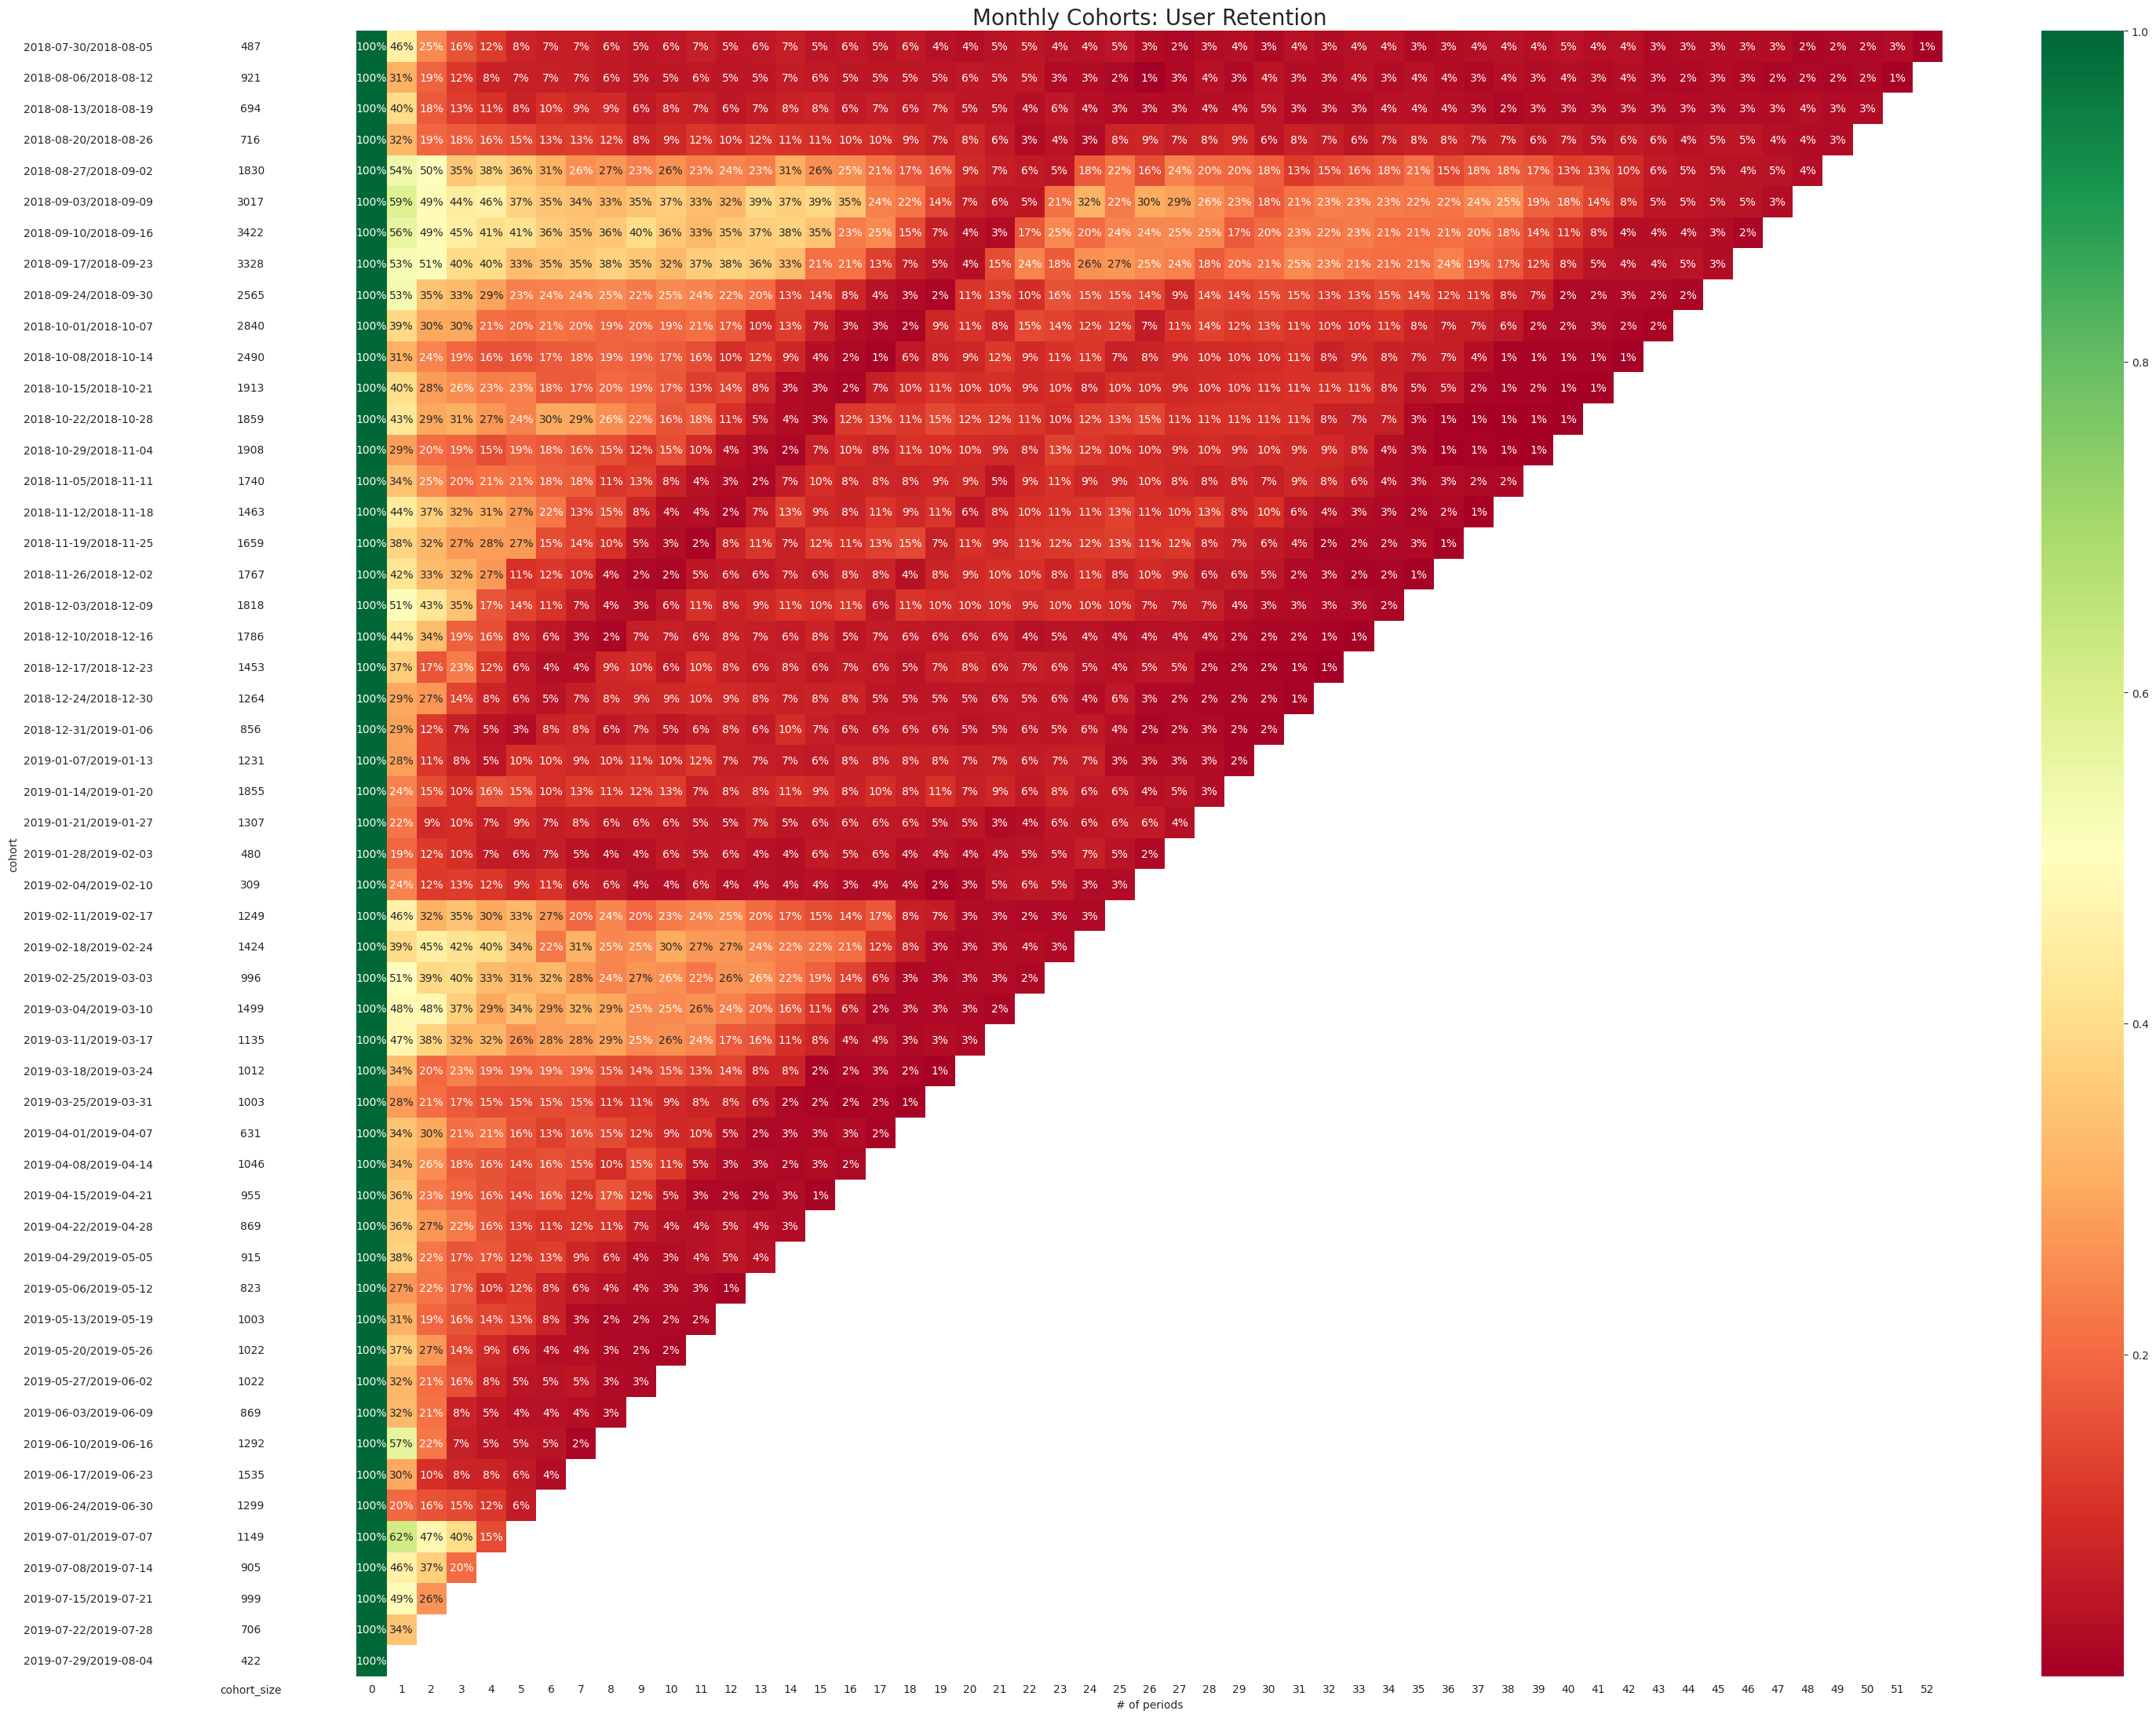

In [12]:
import matplotlib.colors as mcolors
import seaborn as sns
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(30, 22), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=20)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


Based on cohort analysis, retention rate of user doing exsercise increasing in September and February

Based on Taiwan academic calender, we can notice that:

the first day of school is 30 August (after summer holiday)
winter holiday is 10 february - 16 february
source: https://publicholidays.tw/school-holidays/

We can conclude that student more motivated to learn on this platform after holiday and less motivated and getting bored few week after holiday.

**Analyzing Problem-Solving Patterns in Exercises**


In [16]:

merged_data = pd.merge(df_problem,df_content, on='ucid')


difficulty_counts = merged_data.groupby('difficulty')['ucid'].nunique()

print(difficulty_counts)


difficulty
easy      832
hard      149
normal    304
unset      41
Name: ucid, dtype: int64


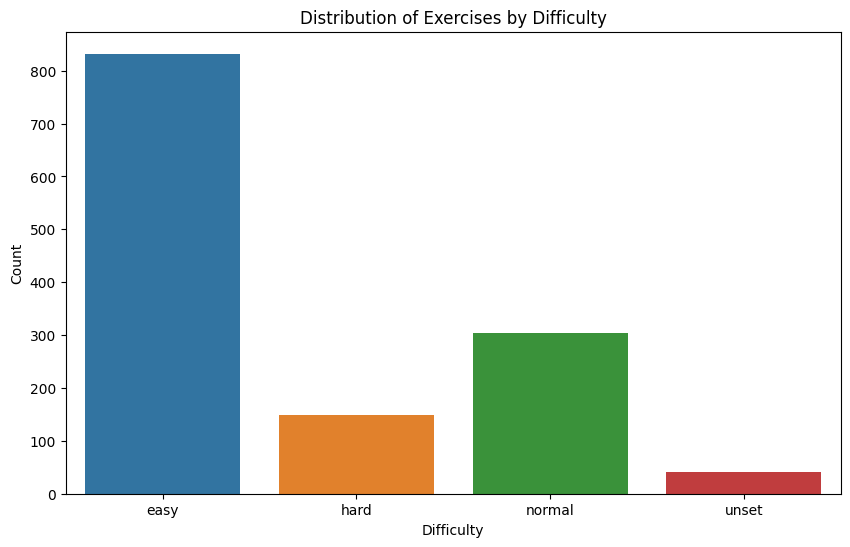

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values)
plt.title('Distribution of Exercises by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count')
plt.show()

easy_exercises = merged_data[merged_data['difficulty'] == 'easy']['ucid'].unique()
normal_exercises = merged_data[merged_data['difficulty'] == 'normal']['ucid'].unique()
hard_exercises = merged_data[merged_data['difficulty'] == 'hard']['ucid'].unique()



In [21]:
df_problem_first_ucid = df_problem[df_problem['ucid'] == df_problem['ucid'][1]]


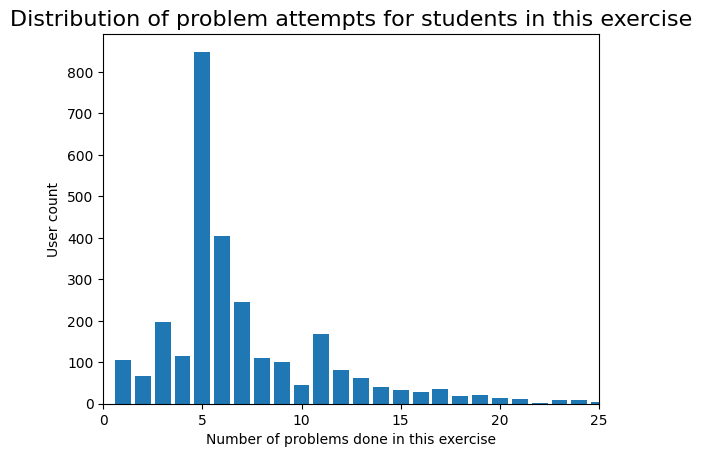

In [22]:
# Calculate number of problems done by each user
df_pcnt = df_problem_first_ucid.groupby('uuid').size().reset_index(name='problem_cnt')
df_pcnt = df_pcnt.sort_values(by=['problem_cnt'])
df_pcnt = df_pcnt.reset_index()

# Sort and plot
pcnt_distribution = df_pcnt['problem_cnt'].value_counts()
pcnt_distribution = pcnt_distribution.sort_index()

plt.bar(pcnt_distribution.index, pcnt_distribution.values)

plt.title('Distribution of problem attempts for students in this exercise', fontsize=16)
plt.xlabel("Number of problems done in this exercise", fontsize=10)
plt.ylabel("User count", fontsize=10)
plt.xlim((0, 25))

plt.show()

We can observe a peak in the plots, most users do 5 or 6 problems in the exercise.
This is mainly due to the proficiency mechanism, users would usually want to upgrade to level 1 and move onto the next exercise.

**Analyzing Active Duration on junyi academy**

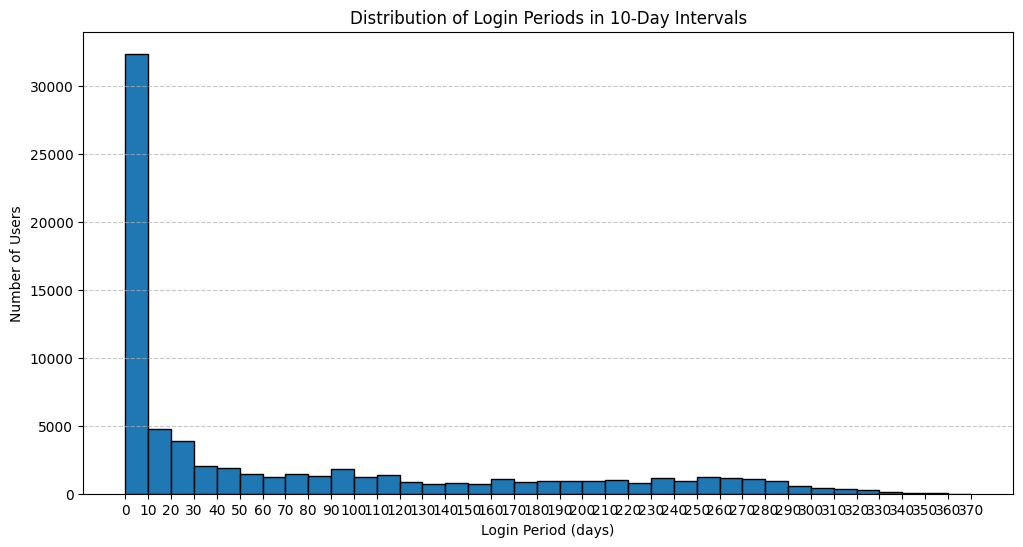

In [23]:

# Convert 'timestamp_TW' column to datetime format
df_problem['timestamp_TW'] = pd.to_datetime(df_problem['timestamp_TW'])

# Group by 'uuid' and calculate the login periods
# Calculate the difference between the first and last login for each user
login_periods = df_problem.groupby('uuid')['timestamp_TW'].agg(['min', 'max'])
login_periods['period'] = (login_periods['max'] - login_periods['min']).dt.days

# Create a new DataFrame with these periods
periods_df = login_periods[['period']]

# Define the bins for 10-day intervals
bins = range(0, periods_df['period'].max() + 10, 10)

# Set the size of the plot
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the distribution of login periods
plt.hist(periods_df['period'], bins=bins, edgecolor='black')
plt.title('Distribution of Login Periods in 10-Day Intervals')
plt.xlabel('Login Period (days)')
plt.ylabel('Number of Users')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


the histogram shows how long users tend to stay engaged with the site and how long users remain active on a website.

as we observe in diagram above 30000 students activated in 10 days.that shows around 40% of students did not tend to continue this platform.

**Investigating the Relationship Between Problem Difficulty and Time Spent**




/tmp/ipykernel_33/2098368390.py:8: FutureWarning: The provided callable <function sum at 0x788d4013b010> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_time = uuidgb['total_sec_taken'].agg(np.sum)


The mean of mean_time_taken for easy: 43.093901620898734
The std of mean_time_taken for easy: 40.49320232088253


/tmp/ipykernel_33/2098368390.py:8: FutureWarning: The provided callable <function sum at 0x788d4013b010> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_time = uuidgb['total_sec_taken'].agg(np.sum)


The mean of mean_time_taken for normal: 57.21751151726002
The std of mean_time_taken for normal: 53.91810239938942


/tmp/ipykernel_33/2098368390.py:8: FutureWarning: The provided callable <function sum at 0x788d4013b010> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_time = uuidgb['total_sec_taken'].agg(np.sum)


The mean of mean_time_taken for hard: 62.027225228613815
The std of mean_time_taken for hard: 62.821397146830606


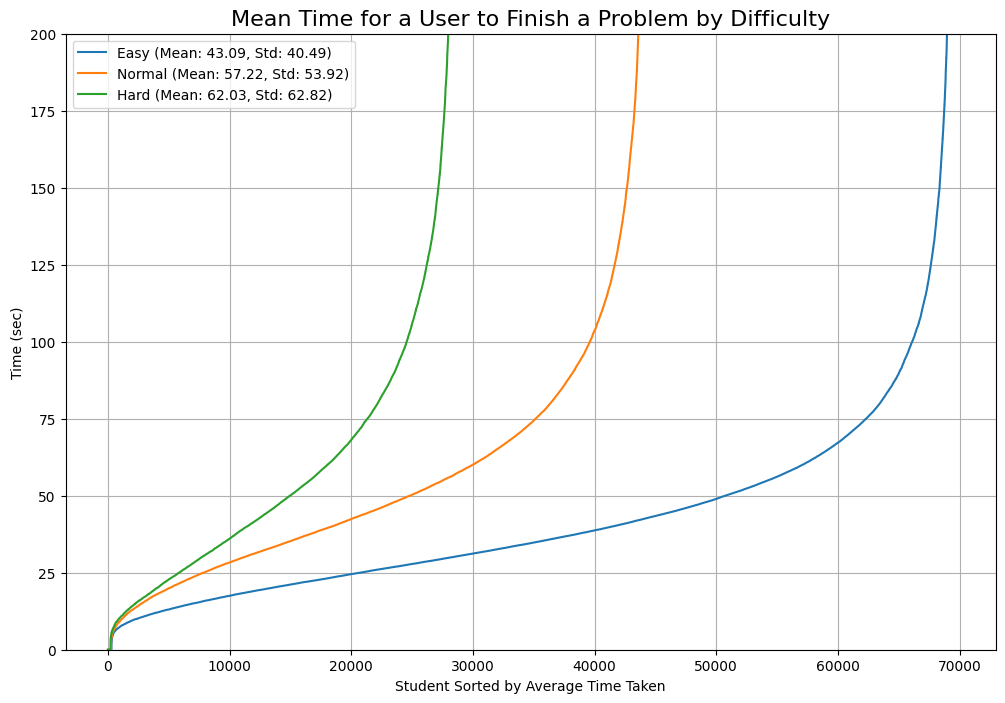

In [26]:

easy_exercises = merged_data[merged_data['difficulty'] == 'easy']
normal_exercises = merged_data[merged_data['difficulty'] == 'normal']
hard_exercises = merged_data[merged_data['difficulty'] == 'hard']

def plot_mean_time_taken(data, difficulty):
    uuidgb = data.groupby('uuid')
    problem_cnt = uuidgb['uuid'].count()
    total_time = uuidgb['total_sec_taken'].agg(np.sum)
    mean_time_taken = total_time / problem_cnt

    mean_time_taken_sorted = np.sort(mean_time_taken)
    print(f"The mean of mean_time_taken for {difficulty}: {mean_time_taken.mean()}")
    print(f"The std of mean_time_taken for {difficulty}: {mean_time_taken.std()}")

    plt.plot(mean_time_taken_sorted, label=f'{difficulty.capitalize()} (Mean: {mean_time_taken.mean():.2f}, Std: {mean_time_taken.std():.2f})')

plt.figure(figsize=(12, 8))

plot_mean_time_taken(easy_exercises, 'easy')
plot_mean_time_taken(normal_exercises, 'normal')
plot_mean_time_taken(hard_exercises, 'hard')

plt.title('Mean Time for a User to Finish a Problem by Difficulty', fontsize=16)
plt.xlabel('Student Sorted by Average Time Taken', fontsize=10)
plt.ylabel('Time (sec)', fontsize=10)
plt.ylim((0, 200))

plt.legend()
plt.grid()
plt.show()


as we have the difficulty of problems in info_content dataset and the time spent in log_problem dataset,we merge these two to have some information about how much time does each problem take according to its difficulty.
we calculate the total time spent divided by the total number of problems attempted, it shows mean of time for user to finish the problem.
as green line shows,More students need more time to solve hard problems but in easy problems the line grows smoothly. if we compare the tree lines , we can observed 60000 students need up to 50 seconds to solve easy problems but in normal problems around 30000 students need this time.in hard problems about 20000 students need up to 50 seconds to solve questions.

**The Relationship Between Problem Difficulty and Correct Answer Rates**





/tmp/ipykernel_33/908296011.py:2: FutureWarning: The provided callable <function sum at 0x7d96dcfdb0a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  correct_count = uuidgb['is_correct'].agg(np.sum)


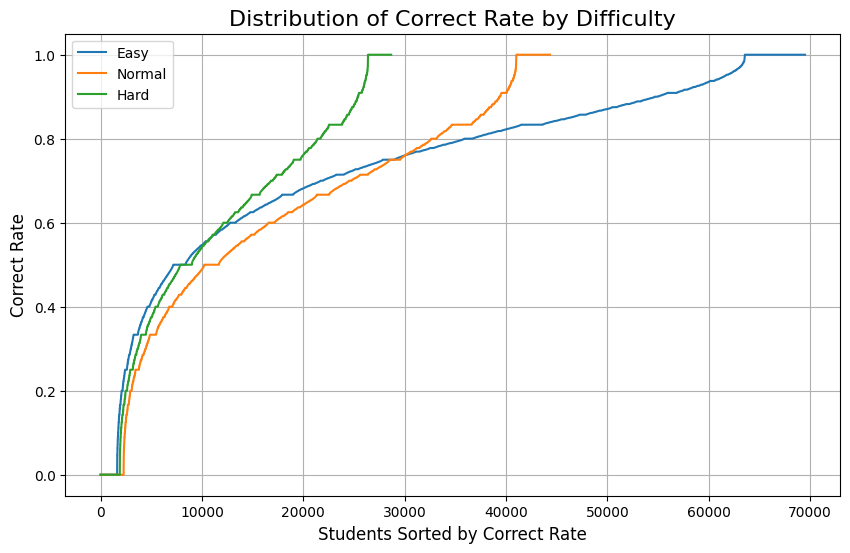

In [6]:
uuidgb = merged_data.groupby(['difficulty', 'uuid'])
correct_count = uuidgb['is_correct'].agg(np.sum)
problem_cnt = uuidgb['uuid'].count()
correct_rate = correct_count / problem_cnt

# Plotting correct rate by difficulty
plt.figure(figsize=(10, 6))

for difficulty in ['easy', 'normal', 'hard']:
    correct_rate_difficulty = correct_rate.loc[difficulty].sort_values()
    plt.plot(correct_rate_difficulty.values, label=difficulty.capitalize())

plt.title('Distribution of Correct Rate by Difficulty', fontsize=16)
plt.xlabel('Students Sorted by Correct Rate', fontsize=12)
plt.ylabel('Correct Rate', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



In [28]:
df_Problem_Content = df_problem[['ucid', 'is_correct']].merge(df_content[['ucid', 'difficulty']], how='inner', left_on='ucid', right_on='ucid')

# We remove the content with difficulty unset for now
df_Problem_Content = df_Problem_Content[df_Problem_Content['difficulty'] != 'unset']

df_Problem_Content = df_Problem_Content.groupby(['difficulty', 'is_correct']).size().unstack(level=-1)
df_Problem_Content['correct_rate'] = df_Problem_Content[True] / (df_Problem_Content[True] + df_Problem_Content[False])

df_Problem_Content.sort_values(by=['correct_rate'], ascending=False)


is_correct,False,True,correct_rate
difficulty,,,
easy,2943941,8185414,0.735480
normal,1169029,2014497,0.632788
hard,543970,872778,0.616043


we calculate the sum of correct answers and the total number of attempted.so we can measure the correct rate by dividing these two.
The lines on the graph indicate that students generally have higher correct rates on easy problems.
The distribution shows that as the difficulty increases, the correct rate decreases for most students.
For easy problems, the curve is smoother and gradually increases, indicating less variability in correct rates among students.
For hard problems, the curve is steeper in places, showing more variability and indicating that some students perform much better than others.

**Temporal Patterns of User Engagement on junyi academy: Analyzing Hourly, Weekly, and Monthly Activity Trends**

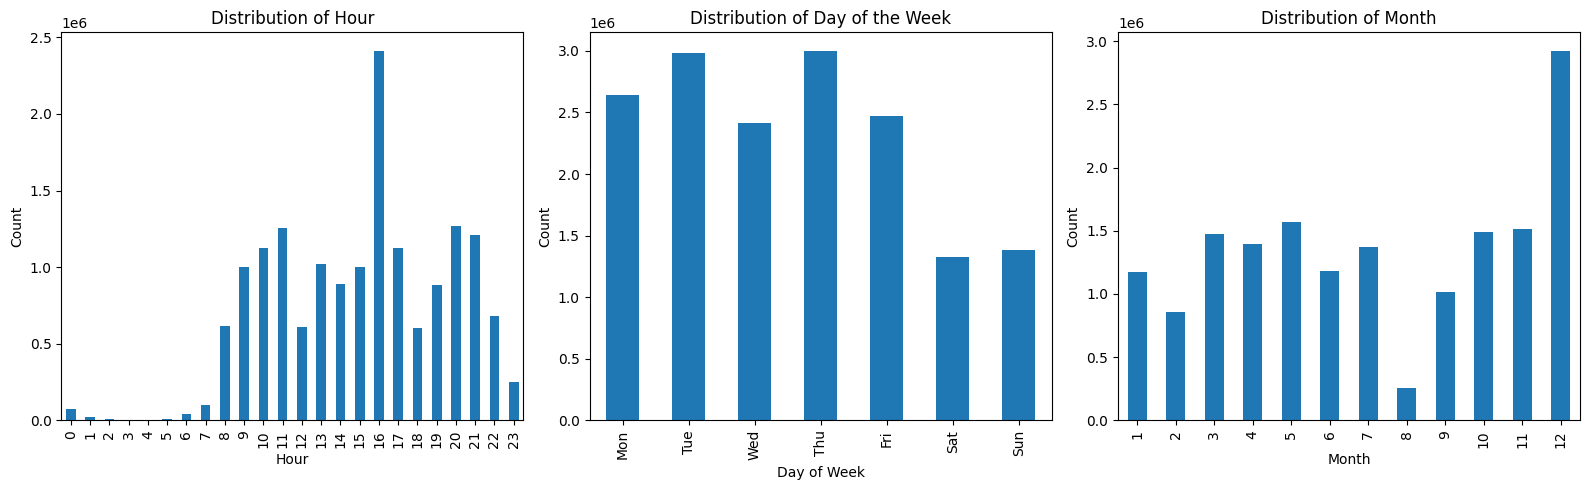

In [24]:
columns_to_remove = ['uuid', 'ucid', 'upid', 'is_correct', 'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade']
df_problem.drop(columns_to_remove, axis=1, inplace=True)

# Time-related features
df_problem['hour'] = df_problem['timestamp_TW'].dt.hour
df_problem['day_of_week'] = df_problem['timestamp_TW'].dt.dayofweek
df_problem['month'] = df_problem['timestamp_TW'].dt.month


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Hour
df_problem['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
df_problem['day_of_week'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Day of the Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Month
df_problem['month'].value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Distribution of Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()
